In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
# Veri setini yükleme
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv')

In [24]:
X = df.drop('Grade', axis=1).values
y = df['Grade'].values

In [25]:
# Verileri eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = Sequential()
model.add(Dense(64, input_dim=7, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [28]:
model.fit(X_train, pd.get_dummies(y_train), epochs=50, batch_size=32, verbose=0)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score

def custom_metrics(y_true, y_pred):
    # Accuracy hesaplama
    accuracy = np.mean(y_true == y_pred)

    # Loss hesaplama (Mean Squared Error)
    loss = mean_squared_error(y_true, y_pred)

    return accuracy, loss

y_pred = model.predict(X_test).argmax(axis=1)
accuracy, loss = custom_metrics(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {accuracy:.4f}')
print(f'Loss: {loss:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

9/9 [==============================] - 0s 3ms/step
Accuracy: 0.7287
Loss: 0.5504
Precision: 0.7857
Recall: 0.7287
F1-Score: 0.7143


9/9 [==============================] - 0s 3ms/step


<Figure size 800x600 with 0 Axes>

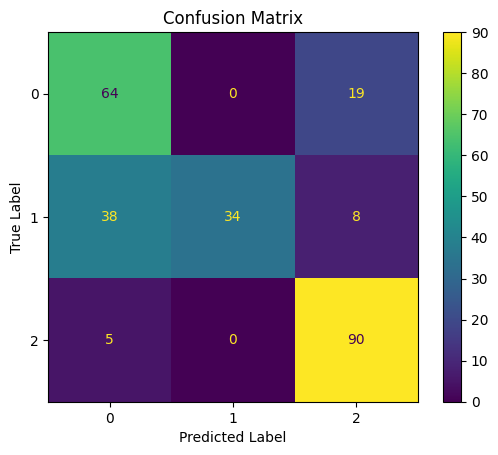

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()